In [1]:
import sys
!{sys.executable} -m pip install numpy
import sys
!{sys.executable} -m pip install matplotlib
import sys
!{sys.executable} -m pip install smart-open

You should consider upgrading via the '/usr/local/Cellar/jupyterlab/3.0.5/libexec/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/local/Cellar/jupyterlab/3.0.5/libexec/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/local/Cellar/jupyterlab/3.0.5/libexec/bin/python3 -m pip install --upgrade pip' command.


In [2]:
import time
import csv
import requests
import numpy as np
import matplotlib.pyplot as plt
from smart_open import open as sm_open

In [3]:
def extract_request(url, payload):
    # Use a breakpoint in the code line below to debug your script.
    print(f'Request url: {url}')  # Press ⌘F8 to toggle the breakpoint.
    print(f'Payload: {payload}')
    r = requests.post(url, json=payload)
    print(r.status_code)
    return r.json()

In [4]:
def job_status(response):
    time.sleep(3)
    # Use a breakpoint in the code line below to debug your script.
    response_url = response['url']
    print(f'Response url: {response_url}')  # Press ⌘F8 to toggle the breakpoint.

    r = requests.get(response_url)
    return r

In [5]:
    payload = {"email": "david.neufeld@noaa.gov", "bbox":"-117.209,32.715,-117.186,32.729"}
    response = extract_request('https://q20bz02j8b.execute-api.us-east-1.amazonaws.com/extract-request', payload)
    status_response = job_status(response)
    while status_response.status_code == 404:
        print("sleeping...")
        time.sleep(3)
        status_response = job_status(response)
        print(status_response.status_code)


    job_payload = status_response.json()
    print(job_payload['status'])
    while str(job_payload['status']) == "RUNNING":
        print(f"Job is still {job_payload['status']}")
        print("sleep...")
        time.sleep(3)
        status_response = job_status(response)
        job_payload = status_response.json()
        print(status_response.status_code)

    print(job_payload['url'])
    s3_url = job_payload['url']

Request url: https://q20bz02j8b.execute-api.us-east-1.amazonaws.com/extract-request
Payload: {'email': 'david.neufeld@noaa.gov', 'bbox': '-117.209,32.715,-117.186,32.729'}
201
Response url: https://q20bz02j8b.execute-api.us-east-1.amazonaws.com/extract-request/68a4e50b-1c45-4b59-8edd-28d02d1cd0ca
RUNNING
Job is still RUNNING
sleep...
Response url: https://q20bz02j8b.execute-api.us-east-1.amazonaws.com/extract-request/68a4e50b-1c45-4b59-8edd-28d02d1cd0ca
200
https://csb-pilot-delivery.s3.amazonaws.com/68a4e50b-1c45-4b59-8edd-28d02d1cd0ca.csv


In [6]:
# Let's use smart_open to read directly fromm our s3 object
def get_csv_s3(url):
    sm_open_file = sm_open(url, 'r')
    return sm_open_file

In [7]:
# Lastly let's visualize our data
# Are there outliers
def visualize(s3_url):
    # Read CSV
    csv_data = []
    csv_file = get_csv_s3(s3_url)

    csv_reader = csv.reader(csv_file, delimiter=',')
    i = 0
    for csv_row in csv_reader:
        if i > 0:
            csv_data.append([csv_row[0], csv_row[1], csv_row[2]])
        i = i + 1

    # Get X, Y, Z
    csv_data = np.array(csv_data)
    csv_data = csv_data.astype( np.float )
    x, y, z = csv_data[:, 0], csv_data[:, 1], (csv_data[:, 2] * -1)

    # Plot X,Y,Z
    fig = plt.figure()
    ax = fig.add_subplot( 111, projection='3d' )
    ax.plot_trisurf(x, y, z, color='white', edgecolors='grey', alpha=0.5)
    ax.scatter(x, y, z, c='red')
    plt.show()

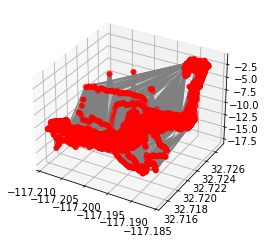

In [8]:
    # Now visualize the file
    visualize(s3_url)

In [9]:
print("Thank you, any questions?!")

Thank you any questions?!
